In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('0', inplace=True)

#برچسب مقدار روی ستون ها
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
sorted_mean_tip_by_sex = df.groupby('sex')['tip'].mean().sort_values()
sorted_median_tip_by_sex = df.groupby('sex')['tip'].median()

sorted_mean_tip_per_day = df.groupby('day')['tip'].mean().sort_values()
sorted_mean_tip.plot(kind='bar')
median_tip_per_day = df.groupby('day')['tip'].median()

mean_tip_by_time = df.groupby('time')['tip'].mean()
median_tip_by_time = df.groupby('time')['tip'].median()

mean_tip_by_size = df.groupby('size')['tip'].mean()
median_tip_by_size = df.groupby('size')['tip'].median()

mean_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].mean()
median_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].median()

mean_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].mean()
median_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].median()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
ax = mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = mean_tip_per_size = df.groupby('size')['tip'].mean().plot(kind='bar', color='orange')
plt.title('* Mean tip by size *')
plt.xlabel('Tip')
plt.ylabel('Size')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = mean_tip_by_sex_smoker.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by gender and smoking status*')
plt.xlabel('Smoker or not?')
plt.ylabel('Mean tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = mean_tip_by_smoker_day.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by smoking status and day of the week*')
plt.xlabel('Day of the week')
plt.ylabel('Mean tip')
add_value_labels(ax)
plt.show()

#فیلتر داده برای روز شنبه و وعده شام
Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
Thursday_lunch = df[(df['day'] == 'Thur') & (df['time'] == 'Lunch')]

#محاسبه میانگین انعام بر اساس جنسیت
mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()
mean_tip_Thursday_lunch = Thursday_lunch.groupby('sex')['tip'].mean()

# رسم نمودار میانگین انعام در روز شنبه و شام بر اساس جنسیت
plt.figure(figsize=(8, 5))
ax = mean_tip_Saturday_dinner.plot (kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Average Tip by Gender on Saturday Dinner')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(8, 5))
ax = mean_tip_Thursday_lunch.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Tip by Gender on Thursday Lunch')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
add_value_labels(ax)
plt.show()



print(df.head())
plt.tight_layout()
plt.show()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


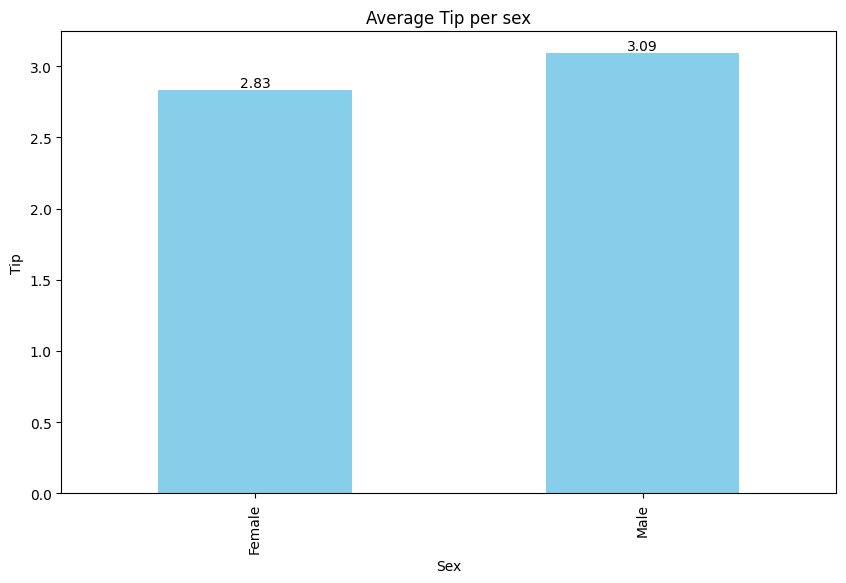

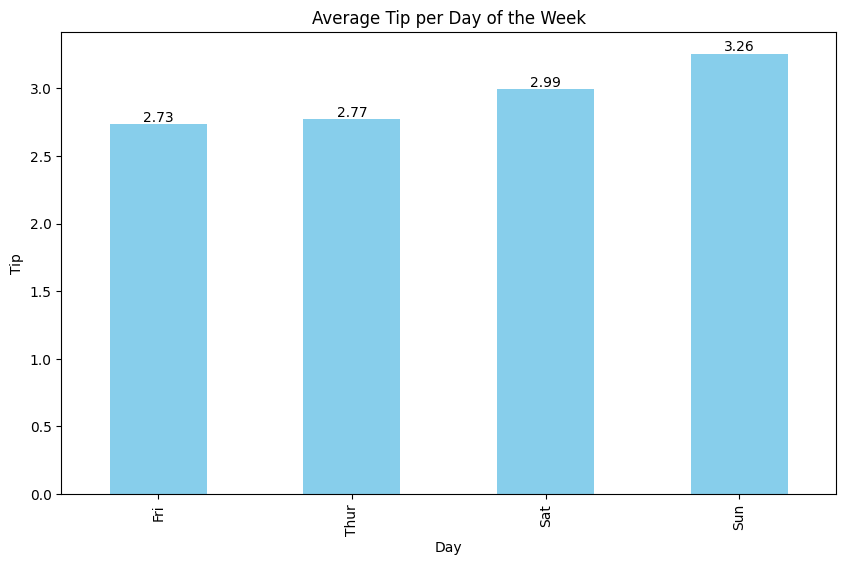

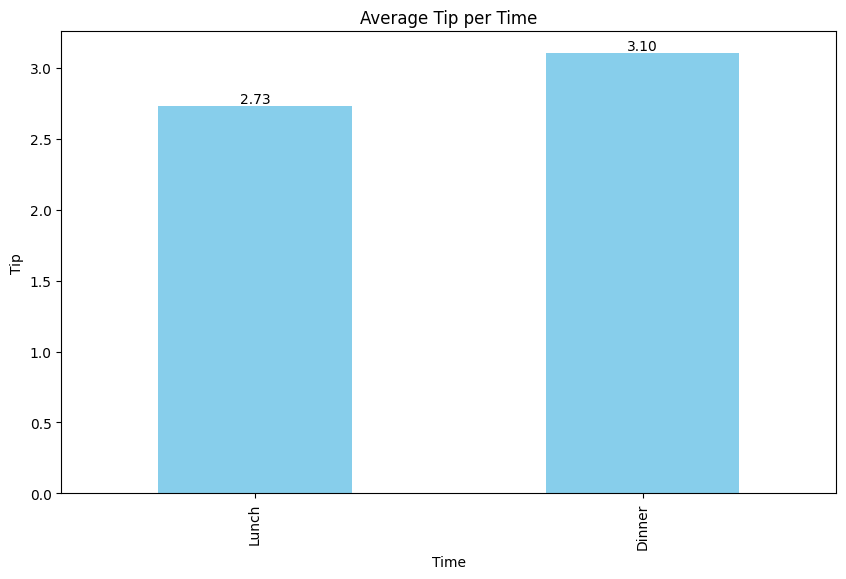

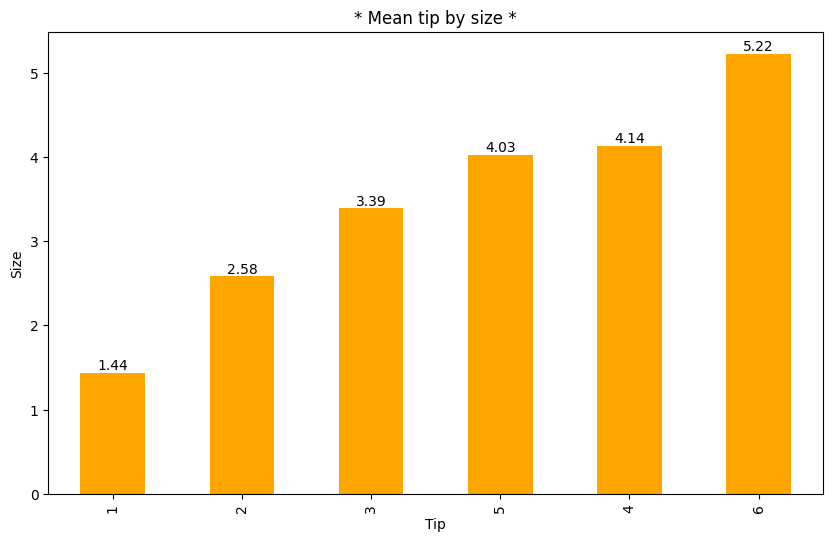

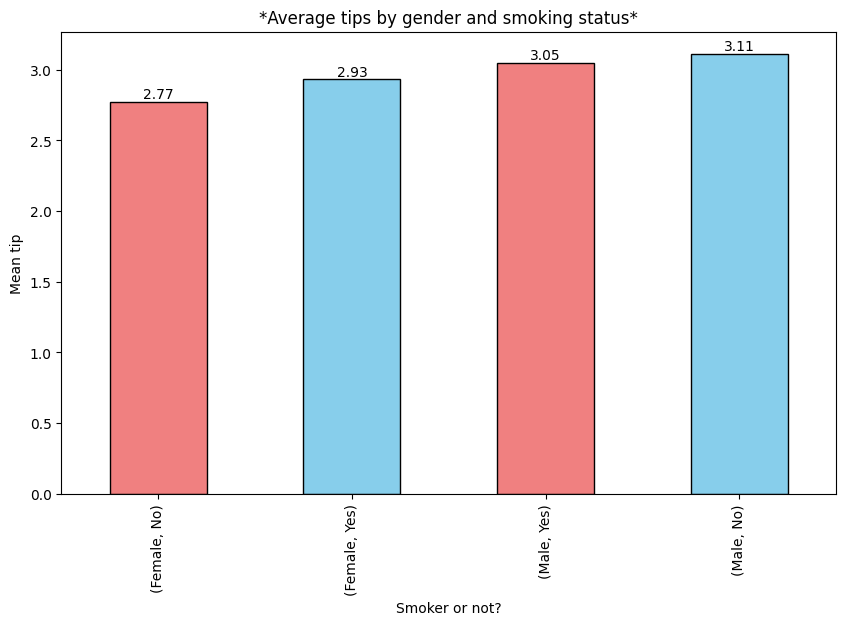

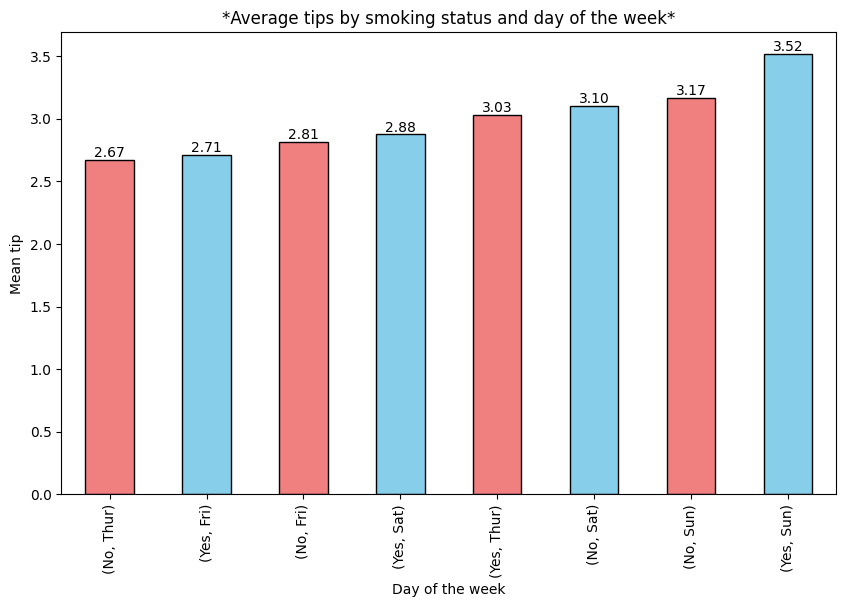

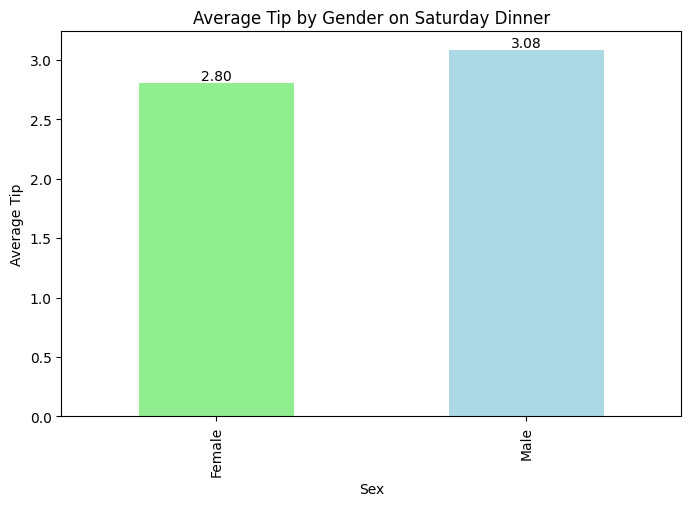

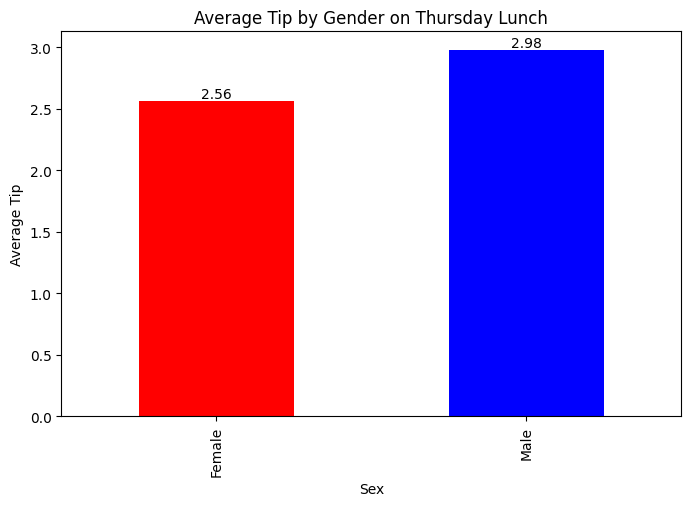

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna(0, inplace=True)

#برچسب مقدار روی ستون ها
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
sorted_mean_tip_by_sex = df.groupby('sex')['tip'].mean().sort_values()
sorted_median_tip_by_sex = df.groupby('sex')['tip'].median()

sorted_mean_tip_per_day = df.groupby('day')['tip'].mean().sort_values()
sorted_median_tip_per_day = df.groupby('day')['tip'].median()

sorted_mean_tip_by_time = df.groupby('time')['tip'].mean().sort_values()
sorted_median_tip_by_time = df.groupby('time')['tip'].median()

sorted_mean_tip_by_size = df.groupby('size')['tip'].mean().sort_values()
sorted_median_tip_by_size = df.groupby('size')['tip'].median()

sorted_mean_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].mean().sort_values()
sorted_median_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].median()

sorted_mean_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].mean().sort_values()
sorted_median_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].median()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_sex.plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_per_day.plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_time.plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_size.plot(kind='bar', color='orange')
plt.title('* Mean tip by size *')
plt.xlabel('Tip')
plt.ylabel('Size')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_sex_smoker.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by gender and smoking status*')
plt.xlabel('Smoker or not?')
plt.ylabel('Mean tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_smoker_day.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by smoking status and day of the week*')
plt.xlabel('Day of the week')
plt.ylabel('Mean tip')
add_value_labels(ax)
plt.show()

#فیلتر داده برای روز شنبه و وعده شام
Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
Thursday_lunch = df[(df['day'] == 'Thur') & (df['time'] == 'Lunch')]

#محاسبه میانگین انعام بر اساس جنسیت
sorted_mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()
sorted_mean_tip_Thursday_lunch = Thursday_lunch.groupby('sex')['tip'].mean()

# رسم نمودار میانگین انعام در روز شنبه و شام بر اساس جنسیت
plt.figure(figsize=(8, 5))
ax = sorted_mean_tip_Saturday_dinner.plot (kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Average Tip by Gender on Saturday Dinner')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(8, 5))
ax = sorted_mean_tip_Thursday_lunch.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Tip by Gender on Thursday Lunch')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
add_value_labels(ax)
plt.show()



print(df.head())
plt.tight_layout()
plt.show()